In [1]:
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.stats import gaussian_kde
import numpy as np
import math
import os

## Bias Boxplots

### Poisson rate - lambda

In [5]:
n_obs_list = [100, 500, 1000, 5000]
simulation_functions = [
    lambda n: n,
    lambda n: int(n * math.log(n)),
    lambda n: int(n ** (3/2)),
    lambda n: n ** 2
]
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']

num_seeds = 101
true_param = 100.0

base_dir = "../res/stereological/"

for n_obs in n_obs_list:
    all_mean_biases = []
    labels = []
    for ii, sim_fn in enumerate(simulation_functions):
        n_sims = 2_500_000
        n_sims = sim_fn(n_obs)
        mean_biases = []
        for i in range(num_seeds):
            dir_path = os.path.join(base_dir, f"npe_n_obs_{n_obs}_n_sims_{n_sims}_seed_{str(i)}")
            if os.path.exists(dir_path):
                full_path = os.path.join(dir_path, "posterior_samples.pkl")
                try:
                    with open(full_path, 'rb') as file:
                        posterior_samples = pkl.load(file)
                        seed_mean_bias = np.mean(posterior_samples, axis=0)[0] - true_param
                        mean_biases.append(seed_mean_bias)
                except FileNotFoundError:
                    continue
        all_mean_biases.append(mean_biases)
        labels.append(n_sims_label[ii])

    plt.figure(figsize=(10, 6))
    plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
    # plt.title(f'Boxplot of Mean Biases for $n_{{\text{{obs}}}}={n_obs}$', fontsize=16)
    plt.xlabel('Choice of N', fontsize=24)
    plt.ylabel('Mean Bias', fontsize=24)
    plt.ylim([-7, 7])
    plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1.5)
    # plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=18)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'plots/stereo_lambda_bias_boxplot_n_obs_{n_obs}.pdf')
    plt.close()

/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/1611866132.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/1611866132.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/1611866132.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipy

### Pareto scale - xi

In [6]:
n_obs_list = [100, 500, 1000, 5000]
simulation_functions = [
    lambda n: n,
    lambda n: int(n * math.log(n)),
    lambda n: int(n ** (3/2)),
    lambda n: n ** 2
]
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']

num_seeds = 101
true_param = 2.0

base_dir = "../res/stereological/"

for n_obs in n_obs_list:
    all_mean_biases = []
    labels = []
    for ii, sim_fn in enumerate(simulation_functions):
        n_sims = sim_fn(n_obs)
        mean_biases = []
        for i in range(num_seeds):
            dir_path = os.path.join(base_dir, f"npe_n_obs_{n_obs}_n_sims_{n_sims}_seed_{str(i)}")
            if os.path.exists(dir_path):
                full_path = os.path.join(dir_path, "posterior_samples.pkl")
                try:
                    with open(full_path, 'rb') as file:
                        posterior_samples = pkl.load(file)
                        seed_mean_bias = np.mean(posterior_samples, axis=0)[1] - true_param
                        mean_biases.append(seed_mean_bias)
                except FileNotFoundError:
                    continue
        all_mean_biases.append(mean_biases)
        labels.append(n_sims_label[ii])

    plt.figure(figsize=(10, 6))
    plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
    # plt.title(f'Boxplot of Mean Biases for $n_{{\text{{obs}}}}={n_obs}$', fontsize=16)
    plt.xlabel('Choice of N', fontsize=24)
    plt.ylim([-1, 4])
    plt.ylabel('Mean Bias', fontsize=24)
    plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1.5)
    # plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=18)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'plots/stereo_xi_bias_boxplot_n_obs_{n_obs}.pdf')
    plt.close()

/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/2120758313.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/2120758313.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/2120758313.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipy

### Pareto shape - sigma

In [7]:
n_obs_list = [100, 500, 1000, 5000]
simulation_functions = [
    lambda n: n,
    lambda n: int(n * math.log(n)),
    lambda n: int(n ** (3/2)),
    lambda n: n ** 2
]
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']

num_seeds = 101
true_param = -0.1

base_dir = "../res/stereological/"

for n_obs in n_obs_list:
    all_mean_biases = []
    labels = []
    for ii, sim_fn in enumerate(simulation_functions):
        n_sims = sim_fn(n_obs)
        mean_biases = []
        for i in range(num_seeds):
            dir_path = os.path.join(base_dir, f"npe_n_obs_{n_obs}_n_sims_{n_sims}_seed_{str(i)}")
            if os.path.exists(dir_path):
                full_path = os.path.join(dir_path, "posterior_samples.pkl")
                try:
                    with open(full_path, 'rb') as file:
                        posterior_samples = pkl.load(file)
                        seed_mean_bias = np.mean(posterior_samples, axis=0)[2] - true_param
                        mean_biases.append(seed_mean_bias)
                except FileNotFoundError:
                    continue
        all_mean_biases.append(mean_biases)
        labels.append(n_sims_label[ii])

    plt.figure(figsize=(10, 6))
    plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
    # plt.title(f'Boxplot of Mean Biases for $n_{{\text{{obs}}}}={n_obs}$', fontsize=16)
    plt.xlabel('Choice of N', fontsize=24)
    plt.ylabel('Mean Bias', fontsize=24)
    plt.ylim([-2, 0.5])
    plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1.5)
    # plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=18)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'plots/stereo_sigma_bias_boxplot_n_obs_{n_obs}.pdf')
    plt.close()

/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/2702901991.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/2702901991.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_5757/2702901991.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipy

## Posterior Plots

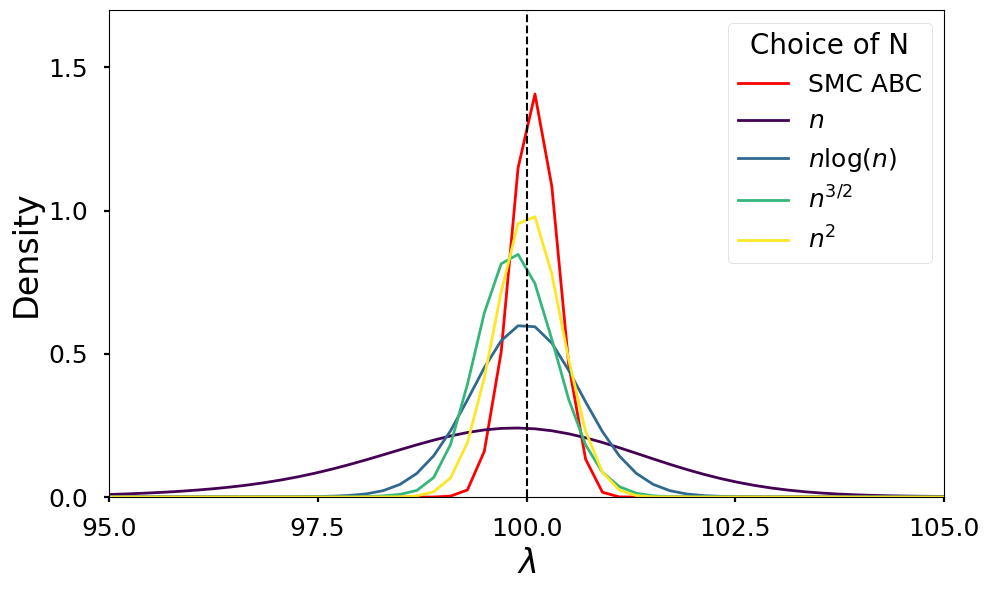

In [18]:
n_sims = ["1000", "6907", "31622", "1000000"]
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size for better readability
bins = None
plt.xlim([90, 110])
colors = plt.cm.viridis(np.linspace(0, 1, len(n_sims)))  # Use a perceptually uniform colormap

with open("../res/stereological_smc_abc/npe_n_obs_1000_n_sims_None_seed_1_max_iter_9/adaptive_smc_samples.pkl", 'rb') as file:
    posterior_samples = pkl.load(file)
    rate_samples = posterior_samples[:, 2]
    kde = gaussian_kde(rate_samples.ravel())
    xs = np.linspace(90, 110, 100)
    plt.plot(xs, kde(xs), label="SMC ABC", color="red", linewidth=2)

for ii, (n_sim, color) in enumerate(zip(n_sims, colors)):
    file_name = f"../res/stereological/npe_n_obs_1000_n_sims_{str(n_sim)}_seed_1/posterior_samples.pkl"
    try:
        with open(file_name, 'rb') as file:
            posterior_samples = pkl.load(file)
            rate_samples = posterior_samples[:, 0]
            kde = gaussian_kde(rate_samples.ravel())
            xs = np.linspace(90, 110, 100)
            plt.plot(xs, kde(xs), label=n_sims_label[ii], color=color, linewidth=2)
    except FileNotFoundError as e:
        print(e)


# Add vertical line with improved style
plt.axvline(100, color="black", linestyle="--", linewidth=1.5)

# Aesthetics improvements
plt.xlim(95, 105)
plt.ylim(0, 1.7)
custom_ticks_x = [95, 97.5, 100, 102.5, 105]  # Endpoints, quarters, and middle
plt.xticks(custom_ticks_x)

custom_ticks_y = [0, 0.5, 1, 1.5]  # Endpoints, quarters, and middle
plt.yticks(custom_ticks_y)

plt.xlabel(r'$\lambda$', fontsize=24)
plt.ylabel('Density', fontsize=24)
# plt.title('Posterior Distributions for Different $n_{\text{sim}}$', fontsize=16)
plt.legend(fontsize=18, title="Choice of N", title_fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)

# Use a style for better presentation (optional)
plt.style.use('seaborn-v0_8-poster')  # or 'ggplot', 'seaborn-darkgrid', etc.

plt.tight_layout()
plt.savefig("plots/stereo_lambda_posterior.pdf")

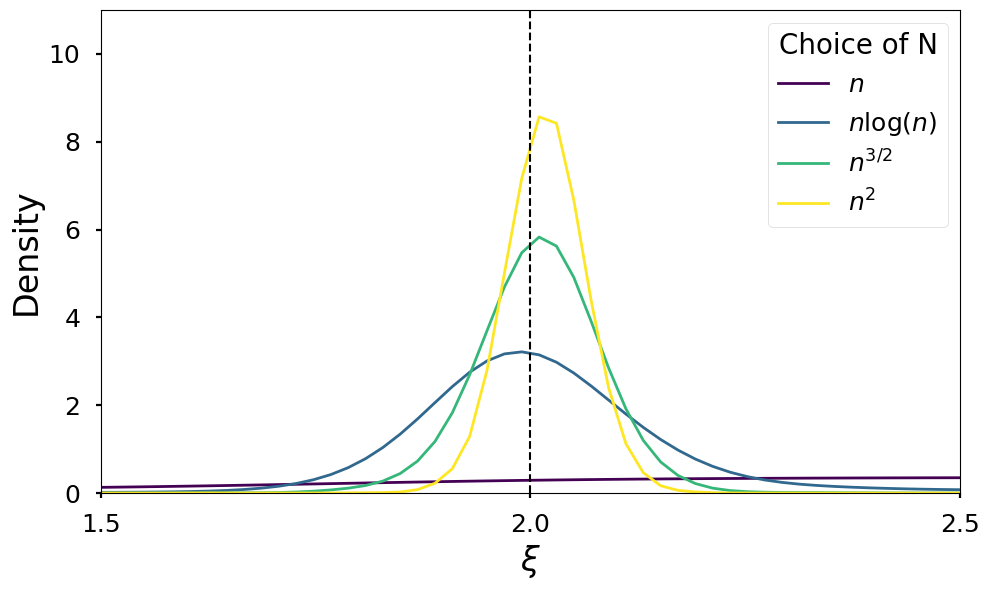

In [21]:
n_sims = ["1000", "6907", "31622", "1000000"]
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size for better readability
bins = None
plt.xlim([1, 3])
colors = plt.cm.viridis(np.linspace(0, 1, len(n_sims)))  # Use a perceptually uniform colormap

for ii, (n_sim, color) in enumerate(zip(n_sims, colors)):
    file_name = f"../res/stereological/npe_n_obs_1000_n_sims_{str(n_sim)}_seed_1/posterior_samples.pkl"
    with open(file_name, 'rb') as file:
        posterior_samples = pkl.load(file)
        rate_samples = posterior_samples[:, 1]
        kde = gaussian_kde(rate_samples.ravel())
        xs = np.linspace(1, 3, 100)
        plt.plot(xs, kde(xs), label=n_sims_label[ii], color=color, linewidth=2)

plt.axvline(2.0, color="black", linestyle="--", linewidth=1.5)

# Aesthetics improvements
custom_ticks_x = [1.5, 2, 2.5]  # Endpoints, quarters, and middle
plt.xticks(custom_ticks_x)

custom_ticks_y = [0, 2, 4, 6, 8, 10]  # Endpoints, quarters, and middle
plt.yticks(custom_ticks_y)
plt.xlim([1.5, 2.5])
plt.ylim(0, 11)
plt.xlabel(r'$\xi$', fontsize=24)
plt.ylabel('Density', fontsize=24)
# plt.title('Posterior Distributions for Different $n_{\text{sim}}$', fontsize=16)
plt.legend(fontsize=18, title="Choice of N", title_fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)

# Use a style for better presentation (optional)
plt.style.use('seaborn-v0_8-poster')  # or 'ggplot', 'seaborn-darkgrid', etc.

plt.tight_layout()
plt.savefig("plots/stereo_xi_posterior.pdf")

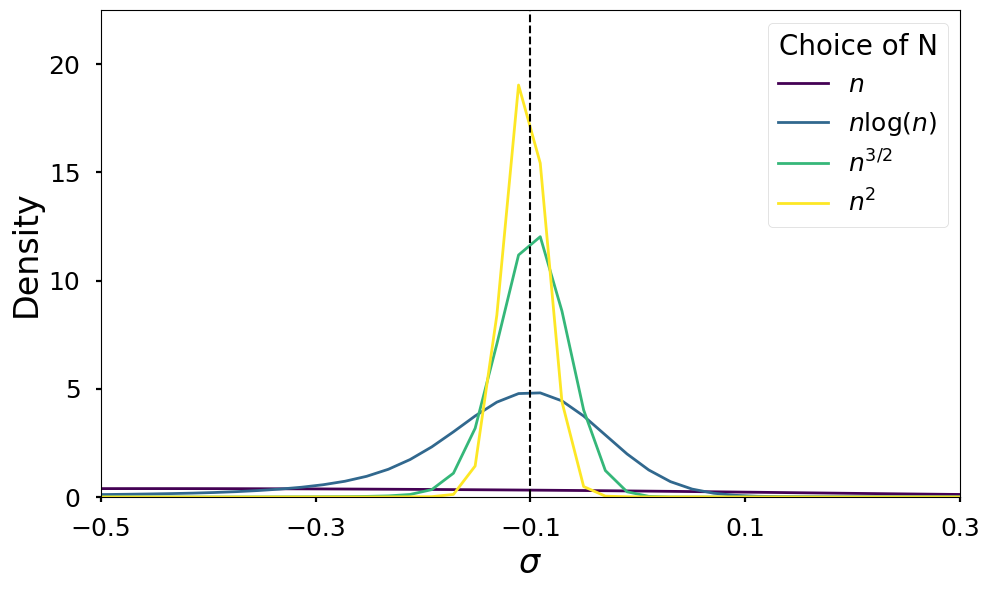

In [22]:
n_sims = ["1000", "6907", "31622", "1000000"]
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size for better readability
bins = None
plt.xlim([-1, 1])
colors = plt.cm.viridis(np.linspace(0, 1, len(n_sims)))  # Use a perceptually uniform colormap

for ii, (n_sim, color) in enumerate(zip(n_sims, colors)):
    file_name = f"../res/stereological/npe_n_obs_1000_n_sims_{str(n_sim)}_seed_1/posterior_samples.pkl"
    with open(file_name, 'rb') as file:
        posterior_samples = pkl.load(file)
        rate_samples = posterior_samples[:, 2]
        kde = gaussian_kde(rate_samples.ravel())
        xs = np.linspace(-1, 1, 100)
        plt.plot(xs, kde(xs), label=n_sims_label[ii], color=color, linewidth=2)

# Add vertical line with improved style
plt.axvline(-0.1, color="black", linestyle="--", linewidth=1.5)

# Aesthetics improvements
plt.xlim([-0.5, 0.3])
plt.ylim(0, 22.5)

custom_ticks_x = [-0.5, -0.3, -0.1, 0.1, 0.3]  # Endpoints, quarters, and middle
plt.xticks(custom_ticks_x)

custom_ticks_y = [0, 5, 10, 15, 20]  # Endpoints, quarters, and middle
plt.yticks(custom_ticks_y)

plt.xlabel(r'$\sigma$', fontsize=24)
plt.ylabel('Density', fontsize=24)
# plt.title('Posterior Distributions for Different $n_{\text{sim}}$', fontsize=16)
plt.legend(fontsize=18, title="Choice of N", title_fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)

# Use a style for better presentation (optional)
plt.style.use('seaborn-v0_8-poster')  # or 'ggplot', 'seaborn-darkgrid', etc.

plt.tight_layout()
plt.savefig("plots/stereo_sigma_posterior.pdf")